In [ ]:
#GitHub Repo: https://github.com/krish-25k/AML_Lab_3.git

In [ ]:
#Name: Krish Yadav
#Batch: 2(AIML)
#Sap ID: 500121939
#E No.: R2142230521

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset from an onlie source (raw GitHub link)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check for columns that shouldn't have zero values
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN in these columns
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate models
def evaluate_model(name, y_test, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_test, y_pred_logreg)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, y_pred_rf)


--- Logistic Regression ---
Accuracy: 0.6948051948051948
Precision: 0.5777777777777777
Recall: 0.48148148148148145
F1 Score: 0.5252525252525253
Confusion Matrix:
 [[81 19]
 [28 26]]


--- Random Forest ---
Accuracy: 0.7857142857142857
Precision: 0.723404255319149
Recall: 0.6296296296296297
F1 Score: 0.6732673267326733
Confusion Matrix:
 [[87 13]
 [20 34]]




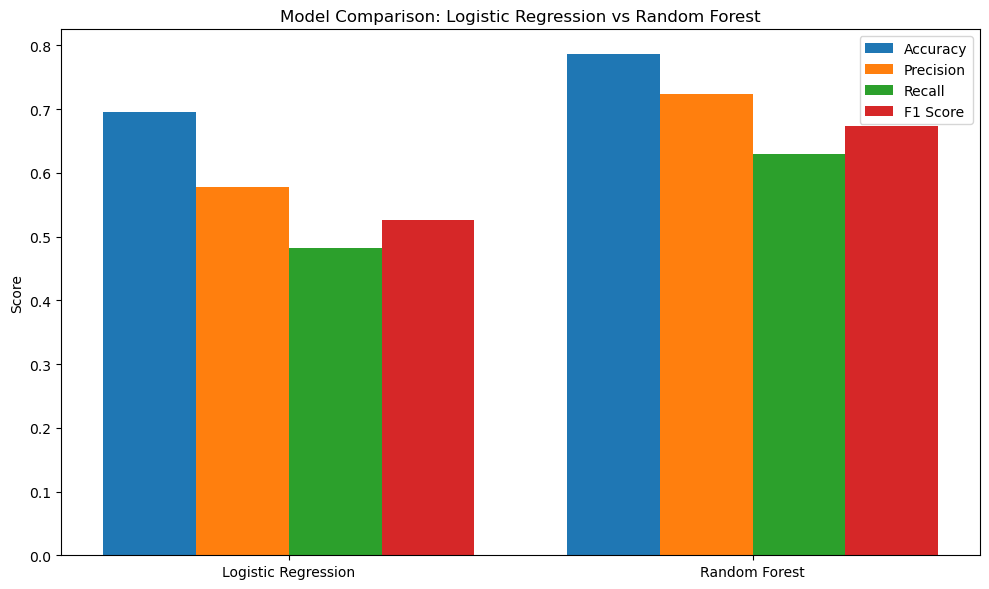

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Collect metrics for both models
models = ['Logistic Regression', 'Random Forest']
accuracy = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_rf)]
precision = [precision_score(y_test, y_pred_logreg), precision_score(y_test, y_pred_rf)]
recall = [recall_score(y_test, y_pred_logreg), recall_score(y_test, y_pred_rf)]
f1 = [f1_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_rf)]

# Create bar chart
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width*1.5, accuracy, width, label='Accuracy')
plt.bar(x - width/2, precision, width, label='Precision')
plt.bar(x + width/2, recall, width, label='Recall')
plt.bar(x + width*1.5, f1, width, label='F1 Score')

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Comparison: Logistic Regression vs Random Forest")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# STEP 6: Conclusion
print("Conclusion:")
if f1[1] > f1[0]:
    print("Random Forest performed better overall in terms of accuracy and F1-score. It's suitable for capturing complex feature interactions.")
else:
    print("Logistic Regression performed well and is simpler, but may underperform compared to ensemble methods like Random Forest.")

Conclusion:
Random Forest performed better overall in terms of accuracy and F1-score. It's suitable for capturing complex feature interactions.
